<img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60">
<center>
    <h1> Product of Integer Numbers with the FFT </h1>
    <h2> Version: 1.1</h2>
    <h2> by Claudio E. Torres </h2> 
    <h2> <a href = "mailto: ctorres@inf.utfsm.cl">ctorres@inf.utfsm.cl</a> </h2>
    
</center>

In [1]:
import numpy as np
import scipy as sp
import copy as cp
import matplotlib.pyplot as plt

In [2]:
# Build an integer as a list of digits of length 'm' in a array length 'length_array'
def generate_array_integer(m,length_array, seed=0):
    np.random.seed(seed)
    i = []
    i.append(np.random.randint(1,9))
    for j in range(1,m):
        i.append(np.random.randint(1,9))
    for j in range(0,length_array-m):
        i.append(0)
    return i
# Convert a list of digits "i" to its corresponding integer number
def array_integer_to_integer(i):
    m=len(i)
    out = 0
    for j in range(m):
        out +=int(i[j])*int(10**j)
    return out
# Convert an integer to a list of digits of length 'length_array'
def integer_to_array_integer(n,length_array):
    nn=list(map(int,str(n)))[::-1]
    for i in range(length_array-len(nn)):
        nn.append(0)
    return nn
# Build the associated 'Fourier Matrix'
def build_fourier_matrix(dim):
    M = np.zeros((dim,dim),dtype=np.complex256)
    for k in range(dim):
        M[k] = np.exp(2j * np.pi * np.arange(dim) * k / dim)
    return M
# Build the associated 'scaled inverse Fourier Matrix'
def build_fourier_matrix_inverse_scaled(dim):
    M = np.zeros((dim,dim),dtype=np.complex256)
    for k in range(dim):
        M[k] = np.exp(-2j * np.pi * np.arange(dim) * k / dim)
    return M
# Just for 'plotting' the values of a matrix
def plot_matrices_with_values(ax,M):
    N=M.shape[0]
    cmap = plt.get_cmap('GnBu')
    ax.matshow(M, cmap=cmap)
    for i in np.arange(0, N):
        for j in np.arange(0, N):
            ax.text(i, j, '{:.2f}'.format(M[i,j]), va='center', ha='center', color='r', fontweight='bold')

# Implementing the DFT via matrix vector product

## Showing DFT matrix, the real and imaginary parts

/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


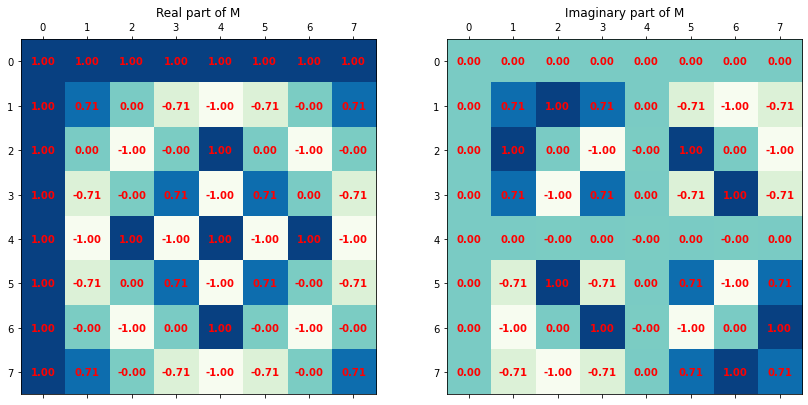

In [3]:
m=4
M = build_fourier_matrix(2*m)

Mfig = 7
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*Mfig,Mfig))
plot_matrices_with_values(ax1,np.real(M))
ax1.set_title('Real part of M')
plot_matrices_with_values(ax2,np.imag(M))
ax2.set_title('Imaginary part of M')
plt.show()

## Setting up experiment

In [4]:
m = 2**4
seed = 3

A = array_integer_to_integer(generate_array_integer(m-5,2*m,seed))
B = array_integer_to_integer(generate_array_integer(m-5,2*m,seed+1))
#print(A,B)

a_k = integer_to_array_integer(A,2*m)
b_k = integer_to_array_integer(B,2*m)
#print(a_k)
#print(b_k)

M = build_fourier_matrix(2*m)

hat_a_k = np.dot(M,np.array(a_k))
hat_b_k = np.dot(M,np.array(b_k))
#print(M)

hat_c_k = hat_a_k*hat_b_k

Mi = build_fourier_matrix_inverse_scaled(2*m)

# Here we divide by 2*m since when we did the analysis we obtained the output scaled by "n", 
# i.e. the length of the array.
c_k = np.round(np.real(np.dot(Mi,hat_c_k)/(2*m)))
C=array_integer_to_integer(c_k)
print('A     : ', A)
print('B     : ', B)
print('A*B   : ', A*B)
print('C     : ', C)
print('C-A*B : ', C-A*B)


A     :  34661114213
B     :  32318126873
A*B   :  1120182286695277545949
C     :  1120182286695277545949
C-A*B :  0


# FFT product

In [5]:
m = 2**14
print(m)
seed = 3

A = array_integer_to_integer(generate_array_integer(m-5,2*m,seed))
B = array_integer_to_integer(generate_array_integer(m-5,2*m,seed+1))

a_k = integer_to_array_integer(A,2*m)
b_k = integer_to_array_integer(B,2*m)

# Adding product by 2*m since the ifft divides by 2*m
hat_a_k = sp.fft.ifft(np.array(a_k),2*m)*2*m
hat_b_k = sp.fft.ifft(np.array(b_k),2*m)*2*m

#print('A  : ', A)
#print('a_k: ', a_k)
#print('hat_a_k: ', hat_a_k)

#print('B  : ', B)
#print('b_k: ', b_k)
#print('hat_b_k: ', hat_b_k)

hat_c_k = hat_a_k*hat_b_k

# Here we divide by 2*m since when we did the analysis we obtained the output scaled by "n", 
# i.e. the length of the array.
c_k = np.round(np.real(sp.fft.fft(hat_c_k,2*m)/(2*m)))
# c_k = np.real(sp.fft.fft(hat_c_k,2*m)/(2*m))
C=array_integer_to_integer(c_k)

print('A     : ', A)
print('B     : ', B)
print('A*B   : ', A*B)
print('C     : ', C)
print('C-A*B : ', C-A*B)

16384


AttributeError: module 'scipy' has no attribute 'fft'

In [14]:
len(a_k)

32768

In [8]:
from sympy import ntt, intt

In [16]:
f_a = ntt(a_k, prime=1267650638007162390353805312001)

ValueError: Expected prime modulus for Number Theoretic Transform